# Time Series Analysis - Influence of birds on the direction 

---


# Data - Creating a simulation 

## Importing libraries and modules 

In [8]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
import os
os.environ["OMP_NUM_THREADS"] = '1'

# Module imports
sys.path.append('..')
import models.vicsek as vicsek
import models.pid as pid
import visualisation as visualisation
import utils
import optimal_labels as opti 


## Launching a simulation

In [9]:
N = 50
L = 10
radius = 1 

In [10]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, noiseAmplitude=0.1, speed=0.3)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

In [11]:
df = utils.simulationDataToDataframe(simulationData)
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_45,theta_y_45,theta_x_46,theta_y_46,theta_x_47,theta_y_47,theta_x_48,theta_y_48,theta_x_49,theta_y_49
0,0.000000,3.410383,8.323307,4.312009,4.478320,7.679681,9.327876,6.539241,3.099237,3.933728,...,-0.622301,0.782778,-0.999992,-0.003924,0.688888,-0.724868,0.898095,0.439802,0.992336,0.123567
1,0.333333,3.317684,8.360815,4.396553,4.424915,7.739605,9.247819,6.635178,3.071024,4.033726,...,-0.744287,0.667860,-0.999301,-0.037385,0.808215,-0.588887,0.541228,-0.840876,0.999499,-0.031642
2,0.666667,3.236566,8.419296,4.475980,4.364157,7.746089,9.148029,6.725700,3.028530,4.114563,...,-0.661668,0.749797,-0.980767,-0.195180,0.902661,-0.430353,0.598369,-0.801221,0.955514,-0.294947
3,1.000000,3.149863,8.469121,4.542954,4.289897,7.753980,9.048341,6.822851,3.004831,4.195053,...,-0.633901,0.773414,-0.959890,-0.280376,0.930034,0.367472,0.758893,-0.651215,0.912244,-0.409648
4,1.333333,3.064223,8.520751,4.609272,4.215052,7.742075,8.949052,6.915978,2.968397,4.273760,...,-0.640968,0.767568,-0.920753,-0.390146,0.896761,0.442516,0.571797,-0.820395,0.856285,-0.516504


In [12]:
df_labels = df_labels = utils.clusters_over_time(df,
                                                  func=utils.periodic_clustering_labels_pos_ang,
                                                    k_coef=1.5, L=L, delta_theta = 0.5, min_samples=5)
df_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1,-1,-1,-1,-1,0,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
1,-1,-1,2,-1,-1,0,1,2,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
2,-1,-1,2,-1,-1,0,1,2,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
3,2,-1,1,-1,1,0,-1,1,-1,-1,...,-1,-1,-1,-1,-1,2,-1,-1,-1,1
4,-1,-1,2,-1,2,0,1,2,-1,-1,...,-1,-1,-1,-1,1,-1,-1,1,-1,2


In [13]:
df_optimal = opti.correct_labels_optimal_assignment(df_labels, df, "contribution")
df_optimal.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1,-1,-1,-1,-1,0,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
1,-1,-1,2,-1,-1,0,1,2,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
2,-1,-1,2,-1,-1,0,1,2,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
3,1,-1,2,-1,2,0,-1,2,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,2
4,-1,-1,2,-1,2,0,1,2,-1,-1,...,-1,-1,-1,-1,1,-1,-1,1,-1,2


# Life span analysis 

## Cluster Life span - Visualisation and categorization

In [14]:
life_span_max, life_span_all = utils.life_span(df_optimal)
print("Life span for optimal labels")
print(life_span_max)
print(life_span_all)
life_span_max, life_span_all = utils.life_span(df_labels)
print("Life span for periodic clustering labels")
print(life_span_max)
print(life_span_all)

Life span for optimal labels
[ 75. 402.  91.   1.   3.   9.   7.   1.  44. 287. 131. 194.]
[[75.0], [402.0], [91.0], [1.0], [3.0], [9.0], [7.0], [1.0], [44.0], [287.0], [131.0], [194.0]]
Life span for periodic clustering labels
[1001.   92.   74.    9.]
[[1001.0], [92.0, 1.0, 1.0, 42.0, 2.0, 12.0], [74.0], [1.0, 3.0, 9.0, 7.0]]


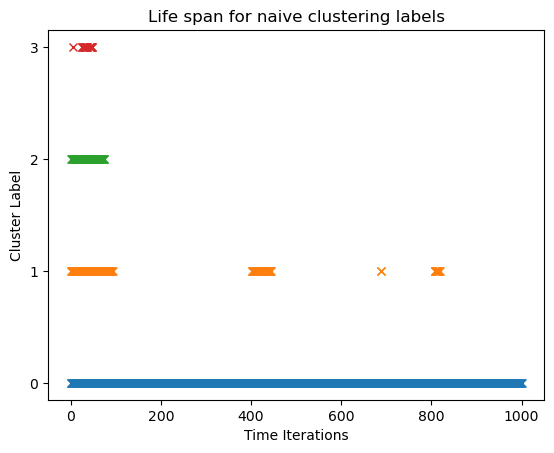

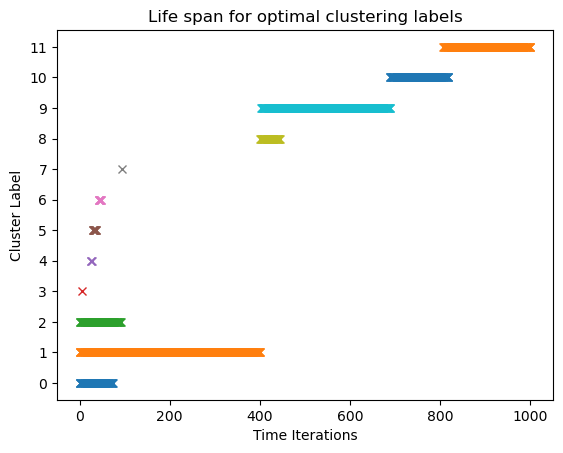

In [15]:
fig, ax = visualisation.plot_cluster_lifespan(df_labels)
ax.set_title("Life span for naive clustering labels")
plt.show()
fig, ax = visualisation.plot_cluster_lifespan(df_optimal)
ax.set_title("Life span for optimal clustering labels")
plt.show()


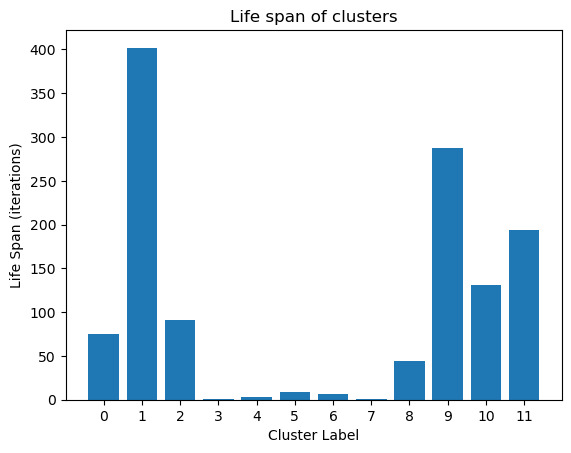

In [16]:
# distribution of life span 
fig, ax = visualisation.barplot_cluster_lifespan(df_optimal)
plt.show()

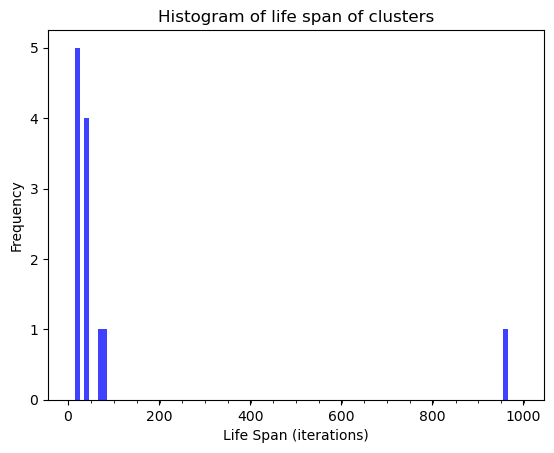

In [17]:
fig, ax = visualisation.plot_life_span_distribution(life_span_all)
plt.show()

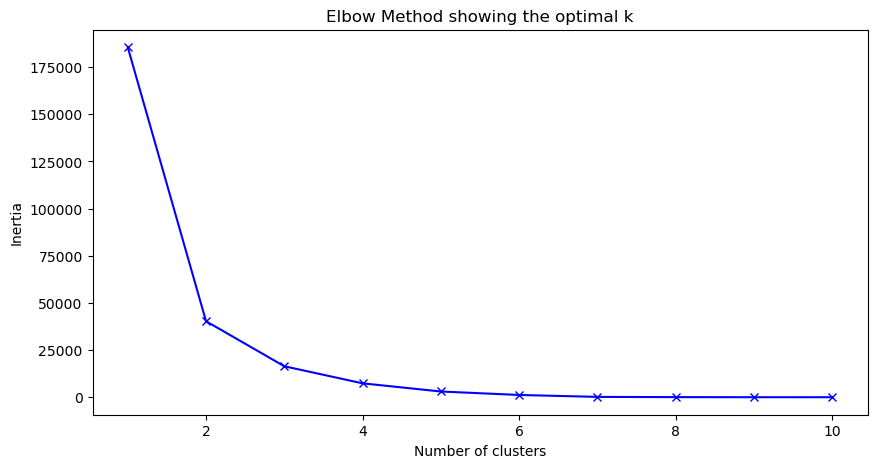

In [18]:
life_span_max, life_span_all = utils.life_span(df_optimal)
fig, ax = visualisation.plot_Kmeans_inertia(life_span_all)
plt.show()

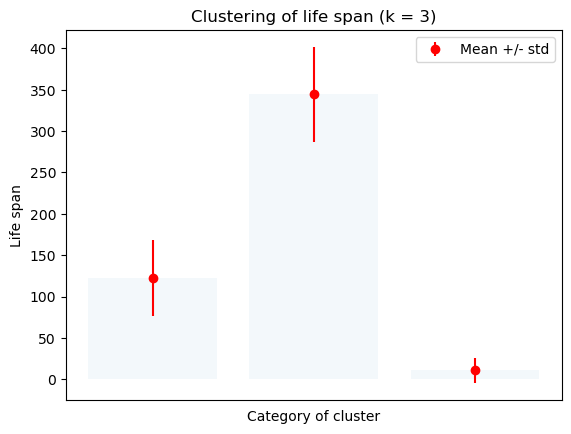

In [19]:

fig, ax = visualisation.plot_categorize_flock(life_span_all, 3)
plt.show()

In [20]:
utils.longer_lasting_cluster(df_optimal)

1

## Birds in cluster 

In [21]:
cluster = utils.longer_lasting_cluster(df_optimal)
cluster

1

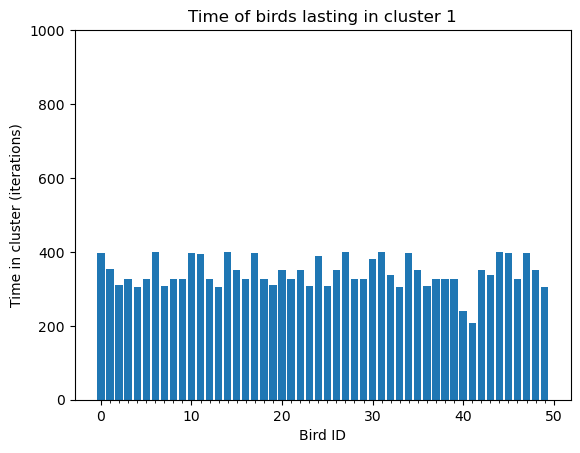

In [22]:

# def barplot_bird_time_in_cluster(df_optimal, cluster):
#     birds_in_cluster = (df_optimal == cluster)
#     bird_cluster_span = birds_in_cluster.astype(int).sum(axis=0).to_numpy()
#     fig, ax = plt.subplots()
#     ax.bar(range(bird_cluster_span.shape[0]), bird_cluster_span)
#     ax.set_xlabel("Bird ID")
#     ax.set_xticks(range(bird_cluster_span.shape[0]), minor=True)
#     ax.set_ylabel("Time in cluster (iterations)")
#     ax.set_ylim(0, df_optimal.shape[0])
#     ax.set_title(f"Time of birds lasting in cluster {cluster}")
#     return fig, ax

fig, ax = visualisation.barplot_bird_time_in_cluster(df_optimal, cluster)
plt.show()

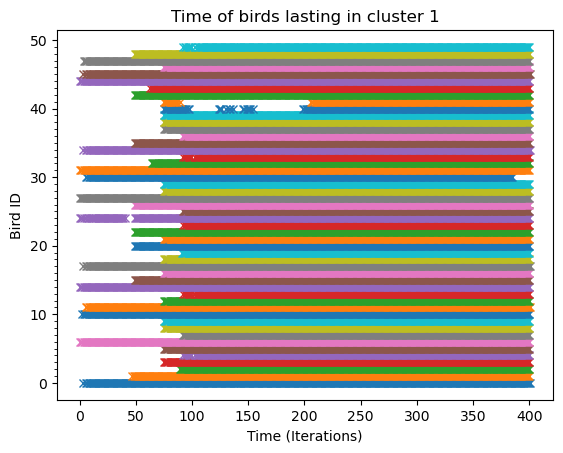

In [23]:
cluster = utils.longer_lasting_cluster(df_optimal)

# def plot_bird_time_in_cluster(df_optimal, cluster):
#     birds_in_cluster = (df_optimal == cluster)
#     # bird_cluster_span = birds_in_cluster.astype(int).sum(axis=0).to_numpy()

#     fig, ax = plt.subplots()
#     for bird in range(df_optimal.shape[1]):
#         mask = birds_in_cluster.iloc[:, bird].to_numpy().astype(bool)
#         x = np.arange(df_optimal.shape[0])[mask]
#         y = np.ones_like(x) * bird
#         ax.plot(x, y, 'x')
#     ax.set(
#         title = f"Time of birds lasting in cluster {cluster}",
#         xlabel = "Time (Iterations)",
#         ylabel = "Bird ID"
#     )
#     ax.set_yticks(range(df_optimal.shape[1]), minor=True)
#     return fig, ax
fig, ax = visualisation.plot_bird_time_in_cluster(df_optimal, cluster)
plt.show()

# Time series Analysis 

## Cluster behaviour - visualisation

In [24]:
flock_orientation = utils.get_flock_orientation(df)   

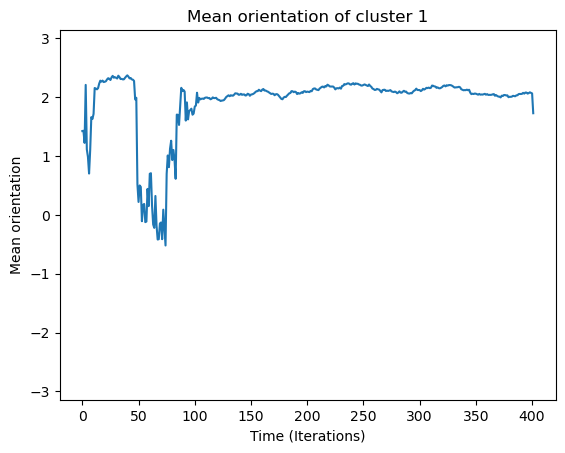

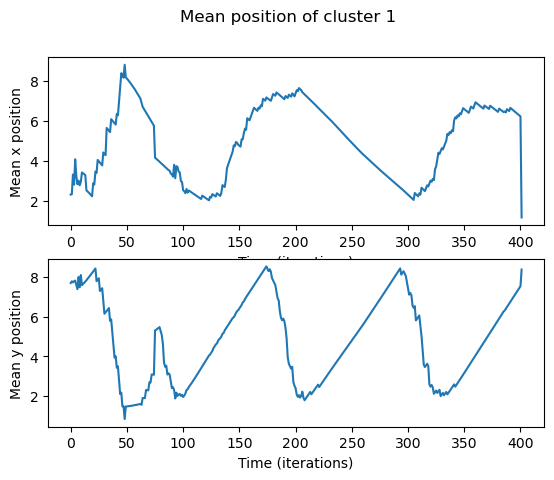

In [25]:
fig, ax = visualisation.plot_cluster_orientation(df, df_optimal, cluster)
plt.show()

fig, ax = visualisation.plot_cluster_position(df, df_optimal, cluster)
plt.show()

## Flock behaviour - Correlation of birds on flock trajectory, on cluster trajectory 

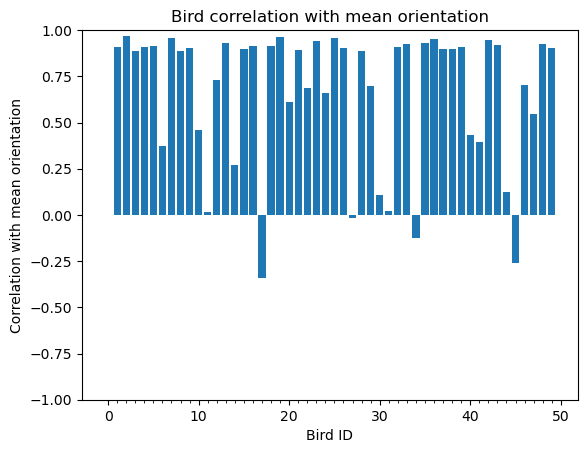

In [26]:
fig, ax = visualisation.plot_bird_correlation_with_mean(df)
plt.show()

## Lag analysis of bird to cluster 

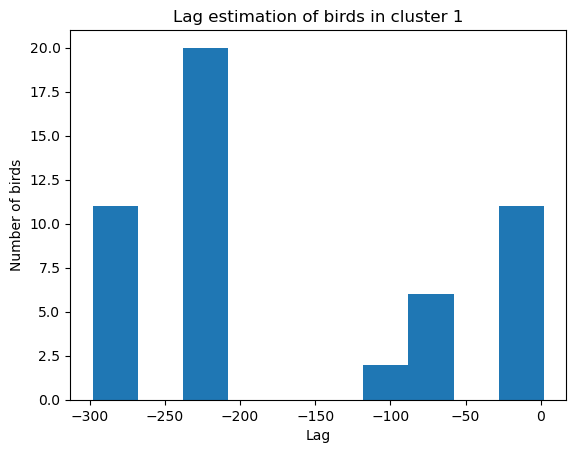

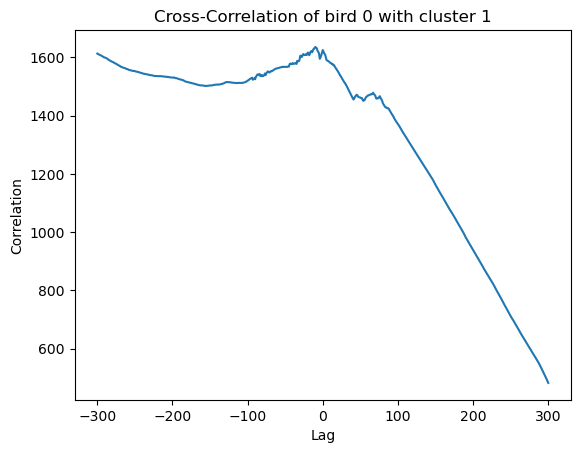

In [27]:
fig, ax = visualisation.plot_cluster_lag_on_mean(df, df_optimal, cluster)
plt.show()

fig, ax = visualisation.plot_cross_correlation(df, df_optimal, cluster, 0, 300)
plt.show()

## Granger Causality analysis 

In [28]:
result_matrix = utils.granger_causality_matrix_flock(df)

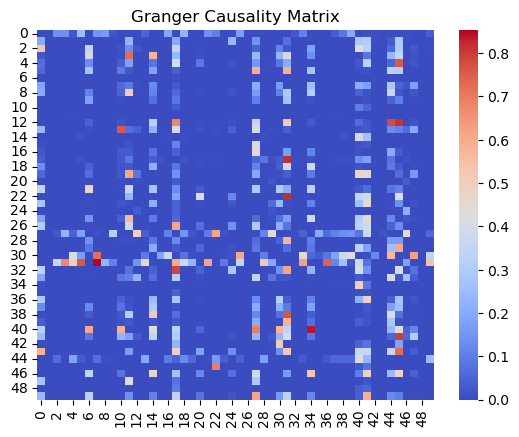

In [29]:
fig, ax = visualisation.heatmap_granger_causality(df)
plt.show()

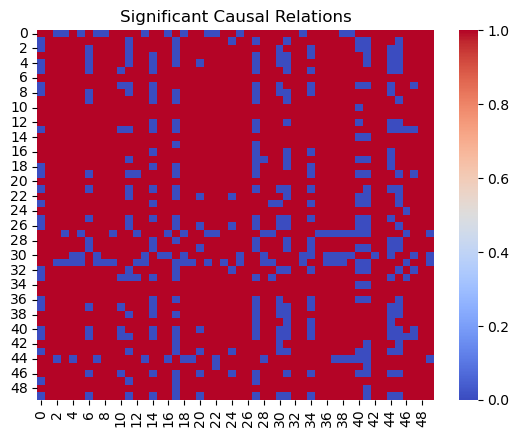

In [30]:
fig, ax = visualisation.heatmap_granger_causality_significant(df)
plt.show()

Calculating Granger Causality Matrix...
The bird that has the most influence : 1
It influences 50 other series.
Plotting...


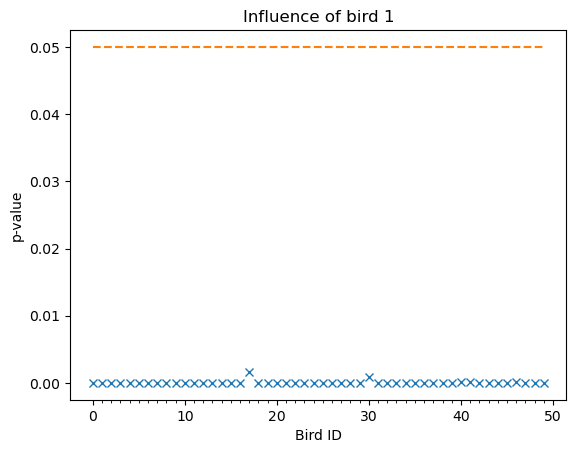

In [31]:
fig, ax = visualisation.plot_most_influent(df)
plt.show()

In [32]:
fig, ax = visualisation.plot_most_influent_bird(df, df_optimal, cluster) 
plt.show()

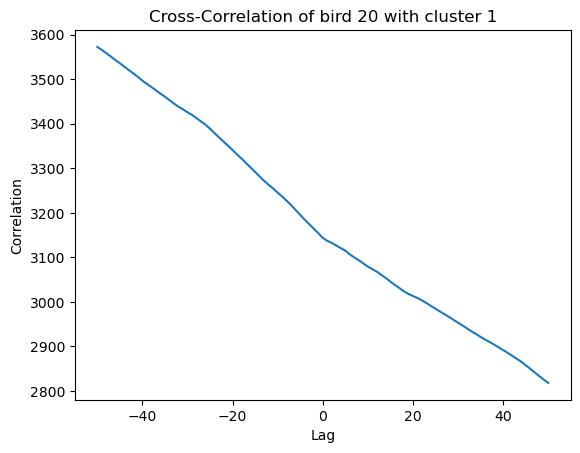

In [ ]:
fig, ax = visualisation.plot_cross_correlation_most_influential_bird(df, df_optimal, cluster)

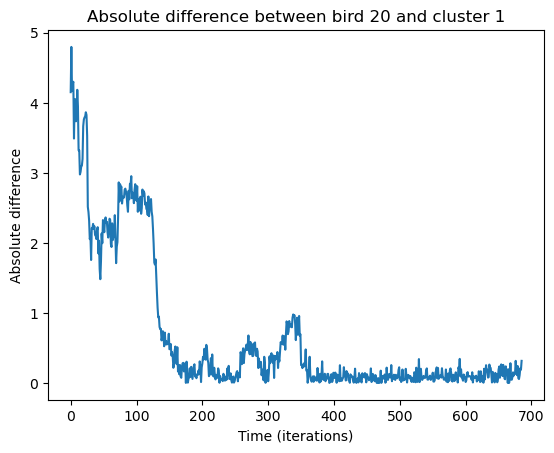

In [ ]:
fig, ax = visualisation.plot_bird_difference_with_cluster(df, df_optimal, cluster)

## Granger Causality on the mean orientation of the flock 

In [ ]:
flock_orientation = utils.get_flock_orientation(df)

causal_relation_with_mean = utils.granger_causality_mean(pd.DataFrame(np.nan_to_num(flock_orientation)), max_lag=10)


Significant birds: [ 0  1  2  3  4  5  6  7  8 10 11 12 15 16 17 18 19 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 40 41 42 43 44 45 47 48]
Least significant birds: [ 9 13 14 20 38 39 46 49]
84.0% of birds have a significant influence on the mean orientation.


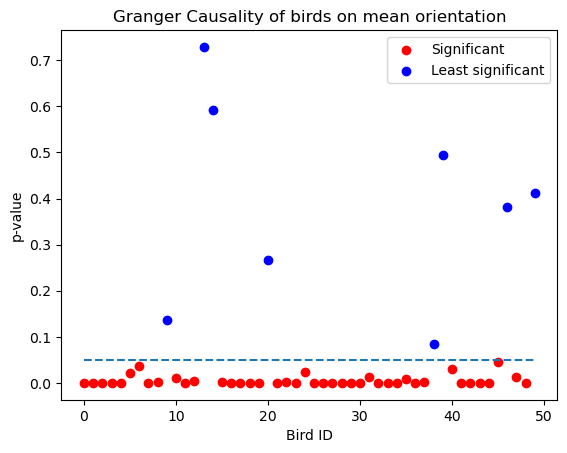

In [ ]:
fig, ax = visualisation.plot_bird_causality_with_mean(df)


## Lag Analysis - Lag on bird trajectories 

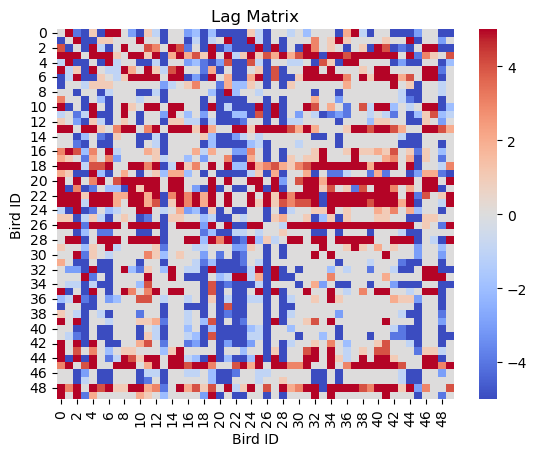

In [ ]:
fig, ax = visualisation.heatmap_lag_matrix(df)
plt.show()

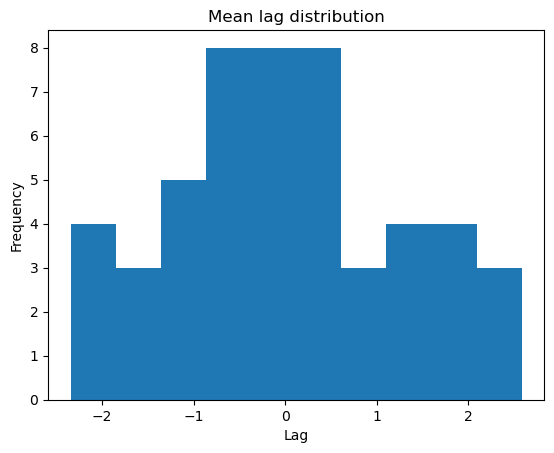

In [ ]:
fig, ax = visualisation.hist_lag_matrix(df)
plt.show()

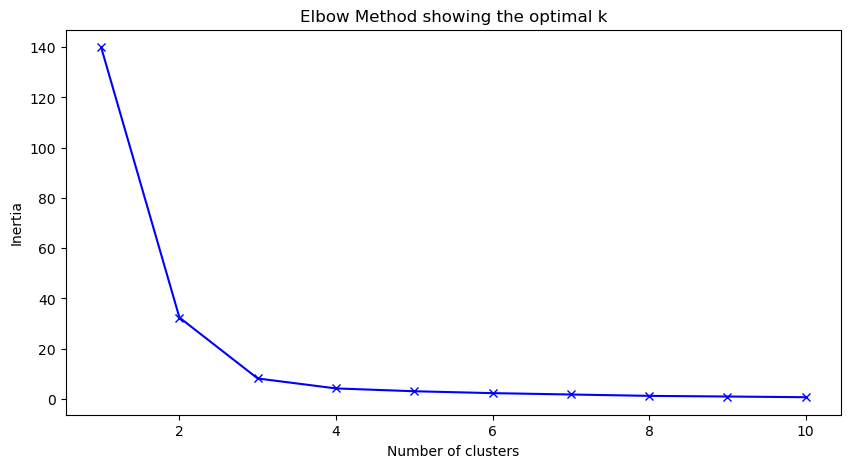

In [ ]:
df_lag = pd.DataFrame(utils.compute_lag_matrix(df))
visualisation.plot_Kmeans_inertia(df_lag.mean().to_numpy().reshape(-1, 1))
plt.show()